**Dataset Loading From Kaggle**

In [ ]:
!kaggle datasets download -d davidcariboo/player-scores

Dataset URL: https://www.kaggle.com/datasets/davidcariboo/player-scores
License(s): CC0-1.0
100% 153M/153M [00:09<00:00, 24.0MB/s]
100% 153M/153M [00:09<00:00, 16.7MB/s]


In [ ]:
!unzip /content/player-scores.zip

Archive:  /content/player-scores.zip
  inflating: appearances.csv         
  inflating: club_games.csv          
  inflating: clubs.csv               
  inflating: competitions.csv        
  inflating: game_events.csv         
  inflating: game_lineups.csv        
  inflating: games.csv               
  inflating: player_valuations.csv   
  inflating: players.csv             
  inflating: transfers.csv           


**Data Cleaning For Clubs**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Dataset Loading
clubs = pd.read_csv('/content/clubs.csv')
clubs.head(5)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,35,25.7,18,51.4,12,Tüpraş Stadyumu,42445,€-18.65m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,24,26.4,18,75.0,18,Olimpico di Roma,73261,€-64.10m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,25,25.2,18,72.0,16,Tottenham Hotspur Stadium,62850,€-93.55m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


In [ ]:
#Dataset information
clubs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  439 non-null    int64  
 1   club_code                439 non-null    object 
 2   name                     439 non-null    object 
 3   domestic_competition_id  439 non-null    object 
 4   total_market_value       0 non-null      float64
 5   squad_size               439 non-null    int64  
 6   average_age              401 non-null    float64
 7   foreigners_number        439 non-null    int64  
 8   foreigners_percentage    390 non-null    float64
 9   national_team_players    439 non-null    int64  
 10  stadium_name             439 non-null    object 
 11  stadium_seats            439 non-null    int64  
 12  net_transfer_record      439 non-null    object 
 13  coach_name               0 non-null      float64
 14  last_season              4

In [ ]:
#Print null values sum
clubs.isnull().sum()

,0
club_id,0
club_code,0
name,0
domestic_competition_id,0
total_market_value,439
squad_size,0
average_age,38
foreigners_number,0
foreigners_percentage,49
national_team_players,0


In [ ]:
clubs_aa_null = clubs[clubs['average_age'].isnull()]
clubs_aa_null.head(40)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
11,21957,ao-platanias,AO Platanias,GR1,NaN,0,NaN,0,NaN,0,Dimotiko Gipedo Perivolia,3700,+-0,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/ao-platanias/s...
26,6996,goverla-uzhgorod,Goverla Uzhgorod (- 2016),UKR1,NaN,0,NaN,0,NaN,0,Avangard,10640,+-0,NaN,2015,../data/raw/transfermarkt-scraper/2015/clubs.j...,https://www.transfermarkt.co.uk/goverla-uzhgor...
39,2477,karpaty-lviv,Karpaty Lviv (-2021),UKR1,NaN,0,NaN,0,NaN,0,Stadion Ukraina,28051,+-0,NaN,2019,../data/raw/transfermarkt-scraper/2019/clubs.j...,https://www.transfermarkt.co.uk/karpaty-lviv/s...
54,566,beerschot-ac,Beerschot AC,BE1,NaN,0,NaN,0,NaN,0,Olympisch Stadion,12771,+-0,NaN,2012,../data/raw/transfermarkt-scraper/2012/clubs.j...,https://www.transfermarkt.co.uk/beerschot-ac/s...
69,1411,raec-mons,RAEC Mons (- 2015),BE1,NaN,0,NaN,0,NaN,0,Stade Charles Tondreau,12662,+-0,NaN,2013,../data/raw/transfermarkt-scraper/2013/clubs.j...,https://www.transfermarkt.co.uk/raec-mons/star...
94,16239,desna-chernigiv,Desna Chernigiv,UKR1,NaN,0,NaN,0,NaN,0,Stadion im. Yuriya Gagarina,12060,+-0,NaN,2021,../data/raw/transfermarkt-scraper/2021/clubs.j...,https://www.transfermarkt.co.uk/desna-chernigi...
99,28956,ael-kalloni,AEL Kalloni,GR1,NaN,0,NaN,0,NaN,0,Stadio Mytilinis,4000,+-0,NaN,2015,../data/raw/transfermarkt-scraper/2015/clubs.j...,https://www.transfermarkt.co.uk/ael-kalloni/st...
122,16247,pfk-stal-kamyanske,PFK Stal Kamyanske (-2018),UKR1,NaN,0,NaN,0,NaN,0,Obolon,5100,+-0,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/pfk-stal-kamya...
123,20100,fc-vestsjaelland,FC Vestsjaelland,DK1,NaN,0,NaN,0,NaN,0,Harboe Arena,10000,+-0,NaN,2014,../data/raw/transfermarkt-scraper/2014/clubs.j...,https://www.transfermarkt.co.uk/fc-vestsjaella...
129,3691,tom-tomsk,Tom Tomsk,RU1,NaN,0,NaN,0,NaN,0,Trud,10028,+-0,NaN,2016,../data/raw/transfermarkt-scraper/2016/clubs.j...,https://www.transfermarkt.co.uk/tom-tomsk/star...


In [ ]:
#Droping the data of squd size = 0
clubs = clubs[clubs['squad_size'] != 0]
clubs.head(5)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,NaN,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,NaN,35,25.7,18,51.4,12,Tüpraş Stadyumu,42445,€-18.65m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,NaN,24,26.4,18,75.0,18,Olimpico di Roma,73261,€-64.10m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,NaN,25,25.2,18,72.0,16,Tottenham Hotspur Stadium,62850,€-93.55m,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


In [ ]:
#Print null values sum
clubs.isnull().sum()

,0
club_id,0
club_code,0
name,0
domestic_competition_id,0
total_market_value,400
squad_size,0
average_age,0
foreigners_number,0
foreigners_percentage,10
national_team_players,0


In [ ]:
clubs_fp_null = clubs[clubs['foreigners_percentage'].isnull()]
clubs_fp_null.head(10)

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,filename,url
50,4128,amkar-perm,Amkar Perm,RU1,NaN,26,26.0,0,NaN,0,Zvezda,17000,+-0,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/amkar-perm/sta...
72,18105,pfk-lviv,PFK Lviv,UKR1,NaN,3,18.3,0,NaN,0,Stadion SKIF,3742,+-0,NaN,2022,../data/raw/transfermarkt-scraper/2022/clubs.j...,https://www.transfermarkt.co.uk/pfk-lviv/start...
82,5220,gs-ergotelis,GS Ergotelis,GR1,NaN,3,23.3,0,NaN,0,Pankritio Stadio,25780,+-0,NaN,2014,../data/raw/transfermarkt-scraper/2014/clubs.j...,https://www.transfermarkt.co.uk/gs-ergotelis/s...
105,39097,fk-obolon-kiew,FK Obolon Kyiv,UKR1,NaN,23,27.6,0,NaN,0,Obolon-Arena,5103,+€350k,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fk-obolon-kiew...
125,2323,orduspor,Orduspor,TR1,NaN,3,20.0,0,NaN,0,19 Eylül Stadyum,11024,+-0,NaN,2012,../data/raw/transfermarkt-scraper/2012/clubs.j...,https://www.transfermarkt.co.uk/orduspor/start...
132,49364,ingulets-petrove,FC Ingulets Petrove,UKR1,NaN,27,25.2,0,NaN,0,Stadion Ingulets,1869,+-0,NaN,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/ingulets-petro...
153,20,bursaspor,Bursaspor,TR1,NaN,26,21.4,0,NaN,0,Bursa Büyükşehir Belediye Stadyumu,43361,+-0,NaN,2018,../data/raw/transfermarkt-scraper/2018/clubs.j...,https://www.transfermarkt.co.uk/bursaspor/star...
206,19771,akhisarspor,Akhisarspor,TR1,NaN,14,21.0,0,NaN,0,Spor Toto Akhisar Stadyumu,12139,+€5k,NaN,2018,../data/raw/transfermarkt-scraper/2018/clubs.j...,https://www.transfermarkt.co.uk/akhisarspor/st...
324,8838,zirka-kropyvnytskyi,Zirka Kropyvnytskyi,UKR1,NaN,7,27.4,0,NaN,0,Zirka,14628,+-0,NaN,2017,../data/raw/transfermarkt-scraper/2017/clubs.j...,https://www.transfermarkt.co.uk/zirka-kropyvny...
414,2292,elazigspor,Elazigspor,TR1,NaN,28,25.3,0,NaN,0,Elazığ Stadyumu,23000,+-0,NaN,2013,../data/raw/transfermarkt-scraper/2013/clubs.j...,https://www.transfermarkt.co.uk/elazigspor/sta...


In [ ]:
#Replacing nun values in Foreigners Percentage by 0
clubs['foreigners_percentage'] = clubs['foreigners_percentage'].fillna(0)
clubs.isnull().sum()

<ipython-input-11-d42974765917>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clubs['foreigners_percentage'] = clubs['foreigners_percentage'].fillna(0)


,0
club_id,0
club_code,0
name,0
domestic_competition_id,0
total_market_value,400
squad_size,0
average_age,0
foreigners_number,0
foreigners_percentage,0
national_team_players,0


In [ ]:
#Drop coach name and total market value columns
clubs = clubs.drop(['coach_name', 'total_market_value'], axis = 1)
clubs.isnull().sum()

,0
club_id,0
club_code,0
name,0
domestic_competition_id,0
squad_size,0
average_age,0
foreigners_number,0
foreigners_percentage,0
national_team_players,0
stadium_name,0


In [ ]:
clubs.head()

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,27,25.6,13,48.1,1,Merck-Stadion am Böllenfalltor,17810,+€3.05m,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,30,26.5,11,36.7,3,Yekaterinburg Arena,23000,+€880k,2023,../data/raw/transfermarkt-scraper/2023/clubs.j...,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,35,25.7,18,51.4,12,Tüpraş Stadyumu,42445,€-18.65m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,Associazione Sportiva Roma,IT1,24,26.4,18,75.0,18,Olimpico di Roma,73261,€-64.10m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,25,25.2,18,72.0,16,Tottenham Hotspur Stadium,62850,€-93.55m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...


In [ ]:
#Reading Competitions Datasets to Get countries names
competitions = pd.read_csv('/content/competitions.csv')
competitions.head(5)

,competition_id,competition_code,name,sub_type,type,country_id,country_name,domestic_league_code,confederation,url,is_major_national_league
0,CIT,italy-cup,italy-cup,domestic_cup,domestic_cup,75,Italy,IT1,europa,https://www.transfermarkt.co.uk/italy-cup/star...,False
1,NLSC,johan-cruijff-schaal,johan-cruijff-schaal,domestic_super_cup,other,122,Netherlands,NL1,europa,https://www.transfermarkt.co.uk/johan-cruijff-...,False
2,GRP,kypello-elladas,kypello-elladas,domestic_cup,domestic_cup,56,Greece,GR1,europa,https://www.transfermarkt.co.uk/kypello-ellada...,False
3,POSU,supertaca-candido-de-oliveira,supertaca-candido-de-oliveira,domestic_super_cup,other,136,Portugal,PO1,europa,https://www.transfermarkt.co.uk/supertaca-cand...,False
4,RUSS,russian-super-cup,russian-super-cup,domestic_super_cup,other,141,Russia,RU1,europa,https://www.transfermarkt.co.uk/russian-super-...,False


In [ ]:
#Merge two dataset to put contry names into clubs dataset
clubs = pd.merge(clubs, competitions[['domestic_league_code', 'country_name']], left_on='domestic_competition_id', right_on='domestic_league_code', how='left')
clubs.drop_duplicates(inplace=True)
clubs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 1039
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   club_id                  400 non-null    int64  
 1   club_code                400 non-null    object 
 2   name                     400 non-null    object 
 3   domestic_competition_id  400 non-null    object 
 4   squad_size               400 non-null    int64  
 5   average_age              400 non-null    float64
 6   foreigners_number        400 non-null    int64  
 7   foreigners_percentage    400 non-null    float64
 8   national_team_players    400 non-null    int64  
 9   stadium_name             400 non-null    object 
 10  stadium_seats            400 non-null    int64  
 11  net_transfer_record      400 non-null    object 
 12  last_season              400 non-null    int64  
 13  filename                 400 non-null    object 
 14  url                      400 n

In [ ]:
#Make a new dataset for clubs (last season 2024)
clubs_2024 = clubs[clubs['last_season'] == 2024]
clubs_2024.head()

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url,domestic_league_code,country_name
6,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,35,25.7,18,51.4,12,Tüpraş Stadyumu,42445,€-18.65m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...,TR1,Turkey
7,12,as-rom,Associazione Sportiva Roma,IT1,24,26.4,18,75.0,18,Olimpico di Roma,73261,€-64.10m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...,IT1,Italy
10,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,25,25.2,18,72.0,16,Tottenham Hotspur Stadium,62850,€-93.55m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...,GB1,England
14,157,kaa-gent,Koninklijke Atletiek Associatie Gent,BE1,27,24.5,19,70.4,9,Planet Group Arena,20185,+€11.08m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/kaa-gent/start...,BE1,Belgium
18,190,fc-kopenhagen,Football Club København,DK1,28,25.2,17,60.7,10,Parken,38065,+€36.89m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fc-kopenhagen/...,DK1,Denmark


In [ ]:
#Checking for new dataset
clubs_2024.describe()

,club_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_seats,last_season
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0
mean,5714.805907,27.569620,25.245992,14.540084,52.686498,7.468354,27689.662447,2024.0
std,15801.676778,3.095993,1.303367,5.189163,17.898615,5.361117,18530.632543,0.0
min,5.000000,20.000000,21.900000,0.000000,0.000000,0.000000,0.000000,2024.0
25%,336.000000,25.000000,24.300000,11.000000,41.900000,3.000000,12454.000000,2024.0
50%,873.000000,27.000000,25.200000,15.000000,53.600000,6.000000,24870.000000,2024.0
75%,2672.000000,29.000000,26.100000,18.000000,66.700000,11.000000,38065.000000,2024.0
max,110302.000000,39.000000,29.000000,30.000000,100.000000,22.000000,81365.000000,2024.0


In [ ]:
def clean_net_transfer(value):
    # Remove currency symbols
    value = value.replace('€', '').replace('+', '').replace('$', '')

    # Handle millions (M) and thousands (k), converting to millions
    if 'm' in value.lower():
        return float(value.lower().replace('m', ''))  # Already in millions, no need to multiply
    elif 'k' in value.lower():
        return float(value.lower().replace('k', '')) / 1000  # Convert thousands to millions
    else:
        return float(value) / 1e6  # If the value is in units, convert it to millions

# Apply the function to clean and convert the 'net_transfer_record' column to millions
clubs_2024['net_transfer_record_cleaned_million'] = clubs_2024['net_transfer_record'].apply(clean_net_transfer)

<ipython-input-18-aae0daf9e05c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clubs_2024['net_transfer_record_cleaned_million'] = clubs_2024['net_transfer_record'].apply(clean_net_transfer)


In [ ]:
clubs_2024.head()

,club_id,club_code,name,domestic_competition_id,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,last_season,filename,url,domestic_league_code,country_name,net_transfer_record_cleaned_million
6,114,besiktas-istanbul,Beşiktaş Jimnastik Kulübü,TR1,35,25.7,18,51.4,12,Tüpraş Stadyumu,42445,€-18.65m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/besiktas-istan...,TR1,Turkey,-18.65
7,12,as-rom,Associazione Sportiva Roma,IT1,24,26.4,18,75.0,18,Olimpico di Roma,73261,€-64.10m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/as-rom/startse...,IT1,Italy,-64.10
10,148,tottenham-hotspur,Tottenham Hotspur Football Club,GB1,25,25.2,18,72.0,16,Tottenham Hotspur Stadium,62850,€-93.55m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/tottenham-hots...,GB1,England,-93.55
14,157,kaa-gent,Koninklijke Atletiek Associatie Gent,BE1,27,24.5,19,70.4,9,Planet Group Arena,20185,+€11.08m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/kaa-gent/start...,BE1,Belgium,11.08
18,190,fc-kopenhagen,Football Club København,DK1,28,25.2,17,60.7,10,Parken,38065,+€36.89m,2024,../data/raw/transfermarkt-scraper/2024/clubs.j...,https://www.transfermarkt.co.uk/fc-kopenhagen/...,DK1,Denmark,36.89


In [ ]:
#Save a df as csv file
clubs_2024.to_csv('clubs_2024.csv', index=False)

**Data Visualization of Clubs**

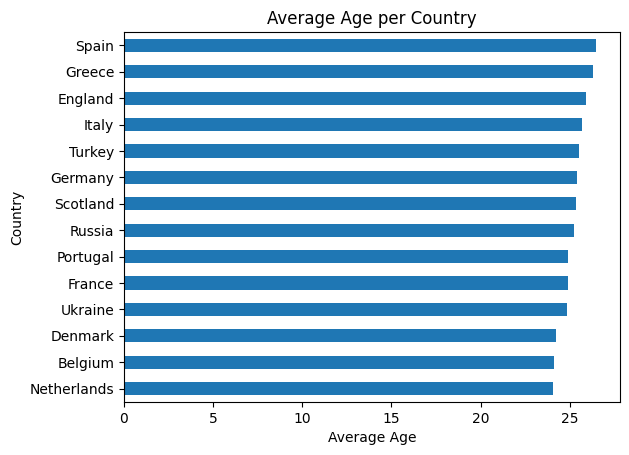

In [ ]:
#Average age per each country
average_age_per_country = clubs_2024.groupby('country_name')['average_age'].mean().sort_values(ascending=True)
average_age_per_country.plot(kind='barh')
plt.xlabel('Average Age')
plt.ylabel('Country')
plt.title('Average Age per Country')
plt.show()

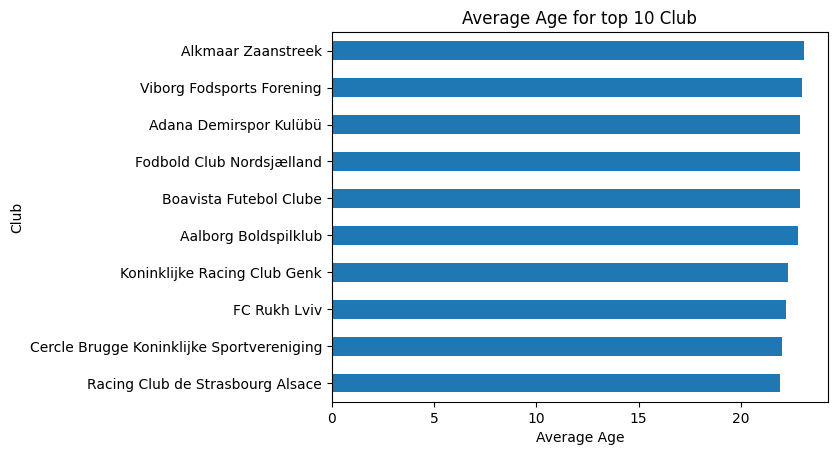

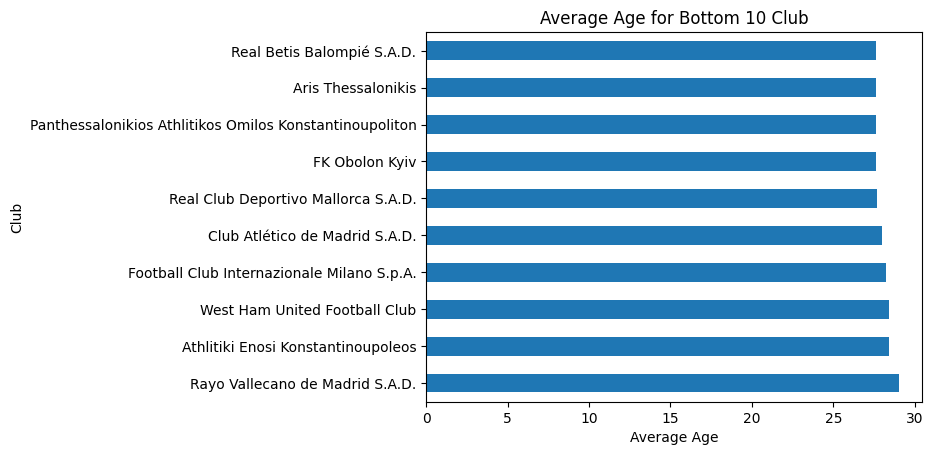

In [ ]:
#Average age per clubs (Top 10)
average_age_per_club_top = clubs_2024.groupby('name')['average_age'].mean().sort_values(ascending=True).head(10)
average_age_per_club_top.plot(kind='barh')
plt.xlabel('Average Age')
plt.ylabel('Club')
plt.title('Average Age for top 10 Club')
plt.show()
#Average age per clubs (Bottom 10)
average_age_per_club_bottom = clubs_2024.groupby('name')['average_age'].mean().sort_values(ascending=False).head(10)
average_age_per_club_bottom.plot(kind='barh')
plt.xlabel('Average Age')
plt.ylabel('Club')
plt.title('Average Age for Bottom 10 Club')
plt.show()

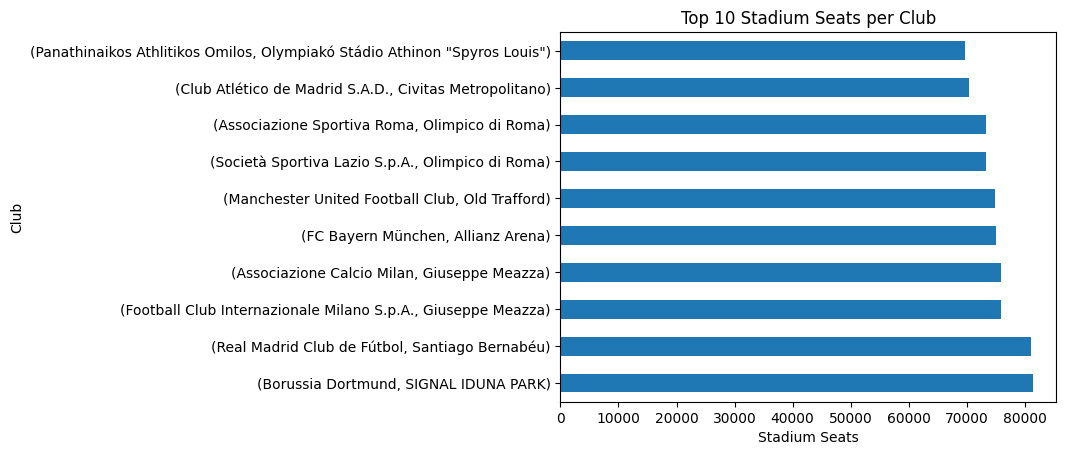

In [ ]:
#Top 10 Stadium seats per Club
top_stadium_per_club = clubs_2024.groupby(['name', 'stadium_name'])['stadium_seats'].mean().sort_values(ascending=False).head(10)
top_stadium_per_club.plot(kind='barh')
plt.xlabel('Stadium Seats')
plt.ylabel('Club')
plt.title('Top 10 Stadium Seats per Club')
plt.show()

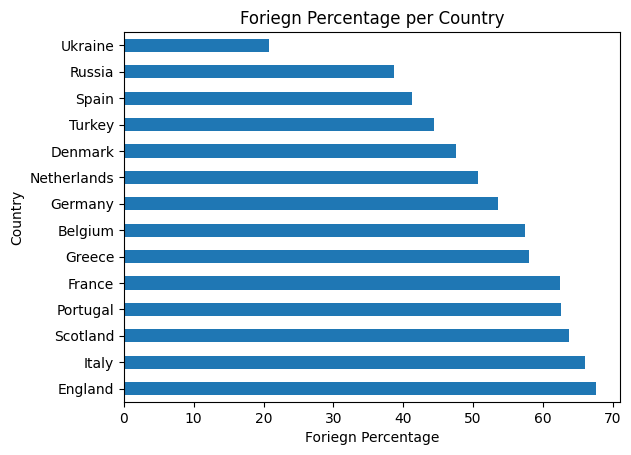

In [ ]:
#Foriegn perenctage players per Country
foriegn_by_country = clubs_2024.groupby('country_name')['foreigners_percentage'].mean(numeric_only=True).sort_values(ascending=False)
foriegn_by_country.plot(kind='barh')
plt.xlabel('Foriegn Percentage')
plt.ylabel('Country')
plt.title('Foriegn Percentage per Country')
plt.show()

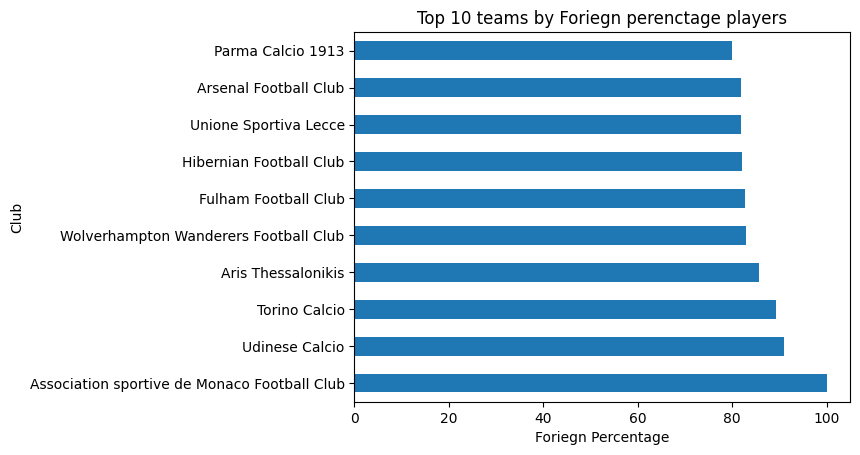

In [ ]:
#Top 10 teams by Foriegn perenctage players
foriegn_by_country_top = clubs_2024.groupby('name')['foreigners_percentage'].mean(numeric_only=True).sort_values(ascending=False).head(10)
foriegn_by_country_top.plot(kind='barh')
plt.xlabel('Foriegn Percentage')
plt.ylabel('Club')
plt.title('Top 10 teams by Foriegn perenctage players')
plt.show()

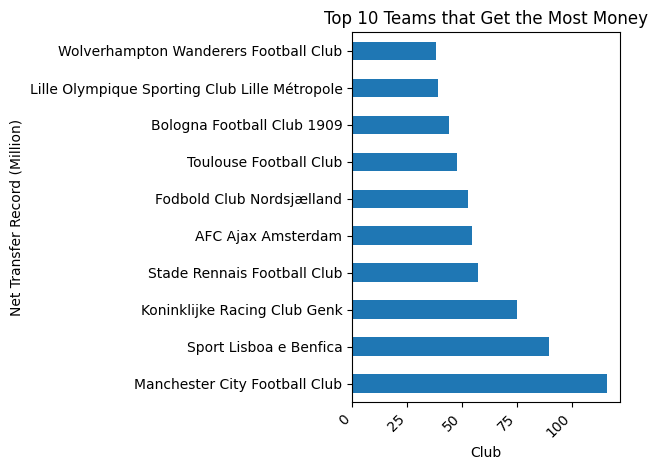

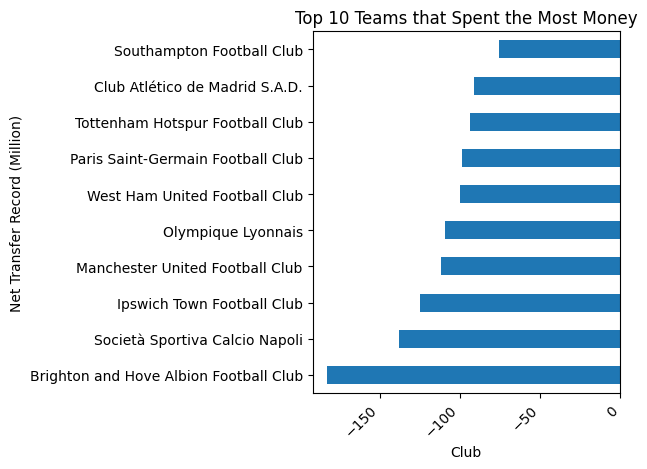

In [ ]:
#Top 10 teams that get the most money
top_10_spent_money = clubs_2024[['name', 'net_transfer_record_cleaned_million']].sort_values(by='net_transfer_record_cleaned_million', ascending=False).head(10)
top_10_spent_money.plot(x='name', y='net_transfer_record_cleaned_million', kind='barh', legend=False)
plt.xlabel('Club')
plt.ylabel('Net Transfer Record (Million)')
plt.title('Top 10 Teams that Get the Most Money')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
#Top 10 teams that spent the most money
top_10_spent_money = clubs_2024[['name', 'net_transfer_record_cleaned_million']].sort_values(by='net_transfer_record_cleaned_million', ascending=True).head(10)
top_10_spent_money.plot(x='name', y='net_transfer_record_cleaned_million', kind='barh', legend=False)
plt.xlabel('Club')
plt.ylabel('Net Transfer Record (Million)')
plt.title('Top 10 Teams that Spent the Most Money')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Data Cleaning For Players**

In [ ]:
players = pd.read_csv('/content/players.csv')
players.head(5)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,right,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0


In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32399 entries, 0 to 32398
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             32399 non-null  int64  
 1   first_name                            30332 non-null  object 
 2   last_name                             32399 non-null  object 
 3   name                                  32399 non-null  object 
 4   last_season                           32399 non-null  int64  
 5   current_club_id                       32399 non-null  int64  
 6   player_code                           32399 non-null  object 
 7   country_of_birth                      29590 non-null  object 
 8   city_of_birth                         29933 non-null  object 
 9   country_of_citizenship                32019 non-null  object 
 10  date_of_birth                         32352 non-null  object 
 11  sub_position   

In [ ]:
playernull = players[players['date_of_birth'].isnull()]
playernull.head(40)
players = players.dropna(subset=['date_of_birth'])
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32352 entries, 0 to 32398
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             32352 non-null  int64  
 1   first_name                            30285 non-null  object 
 2   last_name                             32352 non-null  object 
 3   name                                  32352 non-null  object 
 4   last_season                           32352 non-null  int64  
 5   current_club_id                       32352 non-null  int64  
 6   player_code                           32352 non-null  object 
 7   country_of_birth                      29558 non-null  object 
 8   city_of_birth                         29901 non-null  object 
 9   country_of_citizenship                31973 non-null  object 
 10  date_of_birth                         32352 non-null  object 
 11  sub_position        

In [ ]:
#Calculate Age from Date of Birth
#Calculate Age from Date of Birth
players['date_of_birth'] = pd.to_datetime(players['date_of_birth'])
today = pd.to_datetime('today')
players['age'] = (today - players['date_of_birth']).dt.days / 365.25 # Calculate age and convert to years
players['age'] = players['age'].astype(int) # Convert age to integers
players.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0,46
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0,44
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0,43
3,77,NaN,Lúcio,Lúcio,2012,506,lucio,Brazil,Brasília,Brazil,...,NaN,NaN,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lucio/profil/s...,IT1,Juventus Football Club,200000.0,24500000.0,46
4,80,Tom,Starke,Tom Starke,2017,27,tom-starke,East Germany (GDR),Freital,Germany,...,194.0,NaN,IFM,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/tom-starke/pro...,L1,FC Bayern München,100000.0,3000000.0,43


In [ ]:
players_2024 = players[players['last_season'] == 2024]
players_2024.head()

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur,age
188,3333,James,Milner,James Milner,2024,1237,james-milner,England,Leeds,England,...,175.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/james-milner/p...,GB1,Brighton and Hove Albion Football Club,1000000.0,21000000.0,38
417,5336,Anastasios,Tsokanis,Anastasios Tsokanis,2024,60949,anastasios-tsokanis,Greece,Chalkida,Greece,...,176.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/anastasios-tso...,GR1,Volou Neos Podosferikos Syllogos,400000.0,450000.0,33
644,7161,Jonas,Hofmann,Jonas Hofmann,2024,15,jonas-hofmann,Germany,Heidelberg,Germany,...,176.0,2027-06-30 00:00:00,Dr. Marco Gutfleisch,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/jonas-hofmann/...,L1,Bayer 04 Leverkusen Fußball,10000000.0,16000000.0,32
723,7825,Pepe,Reina,Pepe Reina,2024,1047,pepe-reina,Spain,Madrid,Spain,...,188.0,2025-06-30 00:00:00,NaN,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/pepe-reina/pro...,IT1,Calcio Como,600000.0,22000000.0,42
913,11530,Lionel,Carole,Lionel Carole,2024,3205,lionel-carole,France,Montreuil,France,...,182.0,2025-06-30 00:00:00,PREMIER'ART,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/lionel-carole/...,TR1,Kayserispor Kulübü,550000.0,3500000.0,33


In [ ]:
players_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6533 entries, 188 to 32398
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   player_id                             6533 non-null   int64         
 1   first_name                            6171 non-null   object        
 2   last_name                             6533 non-null   object        
 3   name                                  6533 non-null   object        
 4   last_season                           6533 non-null   int64         
 5   current_club_id                       6533 non-null   int64         
 6   player_code                           6533 non-null   object        
 7   country_of_birth                      6168 non-null   object        
 8   city_of_birth                         6171 non-null   object        
 9   country_of_citizenship                6533 non-null   object        
 10  da

In [ ]:
players_2024.position.unique()

array(['Midfield', 'Goalkeeper', 'Defender', 'Attack', 'Missing'],
      dtype=object)

In [ ]:
players_2024 = players_2024.drop(players_2024[players_2024['position'] == 'Missing'].index) # Use parentheses for calling the drop method. Pass the index of rows where 'position' is 'Missing' to the drop method.

In [ ]:
players_2024.position.unique()

array(['Midfield', 'Goalkeeper', 'Defender', 'Attack'], dtype=object)

In [ ]:
players_2024.to_csv('players_2024.csv', index=False)

**Data Cleaning For Players Transfers**

In [ ]:
transfers = pd.read_csv('/content/transfers.csv')
transfers.head(5)

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
1,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
2,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,10000000.0,Boulaye Dia
3,1047109,2026-06-30,25/26,2672,265,APO Levadiakos,Panathinaikos,0.0,100000.0,Georgios Katris
4,360791,2025-12-31,25/26,6418,1030,Panetolikos,Argentinos Jrs.,0.0,1200000.0,Lucas Chaves


In [ ]:
transfers.describe()

,player_id,from_club_id,to_club_id,transfer_fee,market_value_in_eur
count,7.769100e+04,77691.000000,77691.000000,5.067800e+04,4.812800e+04
mean,4.160745e+05,16951.474276,12801.934819,1.104888e+06,2.452803e+06
std,2.639285e+05,23101.272288,20211.918072,5.250162e+06,5.889319e+06
min,3.333000e+03,1.000000,1.000000,0.000000e+00,1.000000e+04
25%,2.041440e+05,865.000000,601.000000,0.000000e+00,2.000000e+05
50%,3.667460e+05,6665.000000,3001.000000,0.000000e+00,6.000000e+05
75%,5.869860e+05,23987.000000,14589.000000,0.000000e+00,2.000000e+06
max,1.309800e+06,122767.000000,121880.000000,1.800000e+08,1.800000e+08


In [ ]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77691 entries, 0 to 77690
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            77691 non-null  int64  
 1   transfer_date        77691 non-null  object 
 2   transfer_season      77691 non-null  object 
 3   from_club_id         77691 non-null  int64  
 4   to_club_id           77691 non-null  int64  
 5   from_club_name       77691 non-null  object 
 6   to_club_name         77691 non-null  object 
 7   transfer_fee         50678 non-null  float64
 8   market_value_in_eur  48128 non-null  float64
 9   player_name          77691 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 5.9+ MB


In [ ]:
transfers.isnull().sum()

,0
player_id,0
transfer_date,0
transfer_season,0
from_club_id,0
to_club_id,0
from_club_name,0
to_club_name,0
transfer_fee,27013
market_value_in_eur,29563
player_name,0


In [ ]:
transfers['transfer_date'] = pd.to_datetime(transfers['transfer_date'])
transfers.describe()

,player_id,transfer_date,from_club_id,to_club_id,transfer_fee,market_value_in_eur
count,7.769100e+04,77691,77691.000000,77691.000000,5.067800e+04,4.812800e+04
mean,4.160745e+05,2018-10-31 21:08:05.291732224,16951.474276,12801.934819,1.104888e+06,2.452803e+06
min,3.333000e+03,1993-07-01 00:00:00,1.000000,1.000000,0.000000e+00,1.000000e+04
25%,2.041440e+05,2016-01-19 00:00:00,865.000000,601.000000,0.000000e+00,2.000000e+05
50%,3.667460e+05,2019-07-25 00:00:00,6665.000000,3001.000000,0.000000e+00,6.000000e+05
75%,5.869860e+05,2022-07-01 00:00:00,23987.000000,14589.000000,0.000000e+00,2.000000e+06
max,1.309800e+06,2026-06-30 00:00:00,122767.000000,121880.000000,1.800000e+08,1.800000e+08
std,2.639285e+05,NaN,23101.272288,20211.918072,5.250162e+06,5.889319e+06


In [ ]:
transfers = transfers[transfers['transfer_date'].dt.year >= 2015]
transfers.describe()

,player_id,transfer_date,from_club_id,to_club_id,transfer_fee,market_value_in_eur
count,6.251600e+04,62516,62516.000000,62516.000000,4.277200e+04,4.303600e+04
mean,4.699969e+05,2020-08-19 10:45:31.844647424,15644.251552,12186.805890,1.197296e+06,2.569489e+06
min,3.333000e+03,2015-01-01 00:00:00,1.000000,1.000000,0.000000e+00,1.000000e+04
25%,2.726410e+05,2018-07-01 00:00:00,703.000000,515.000000,0.000000e+00,2.500000e+05
50%,4.331790e+05,2020-10-07 00:00:00,4414.000000,2687.000000,0.000000e+00,6.000000e+05
75%,6.411530e+05,2023-01-12 00:00:00,20519.000000,12567.000000,0.000000e+00,2.000000e+06
max,1.309800e+06,2026-06-30 00:00:00,122767.000000,121880.000000,1.800000e+08,1.800000e+08
std,2.588779e+05,NaN,22534.033562,20185.220333,5.541979e+06,6.088999e+06


In [ ]:
transfers.isnull().sum()

,0
player_id,0
transfer_date,0
transfer_season,0
from_club_id,0
to_club_id,0
from_club_name,0
to_club_name,0
transfer_fee,19744
market_value_in_eur,19480
player_name,0


In [ ]:
transfers['transfer_fee'] = transfers['transfer_fee'].fillna(0)
transfers.describe()

<ipython-input-44-d55a2bd903d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transfers['transfer_fee'] = transfers['transfer_fee'].fillna(0)


,player_id,transfer_date,from_club_id,to_club_id,transfer_fee,market_value_in_eur
count,6.251600e+04,62516,62516.000000,62516.000000,6.251600e+04,4.303600e+04
mean,4.699969e+05,2020-08-19 10:45:31.844647424,15644.251552,12186.805890,8.191622e+05,2.569489e+06
min,3.333000e+03,2015-01-01 00:00:00,1.000000,1.000000,0.000000e+00,1.000000e+04
25%,2.726410e+05,2018-07-01 00:00:00,703.000000,515.000000,0.000000e+00,2.500000e+05
50%,4.331790e+05,2020-10-07 00:00:00,4414.000000,2687.000000,0.000000e+00,6.000000e+05
75%,6.411530e+05,2023-01-12 00:00:00,20519.000000,12567.000000,0.000000e+00,2.000000e+06
max,1.309800e+06,2026-06-30 00:00:00,122767.000000,121880.000000,1.800000e+08,1.800000e+08
std,2.588779e+05,NaN,22534.033562,20185.220333,4.617693e+06,6.088999e+06


In [ ]:
transfers.isnull().sum()

,0
player_id,0
transfer_date,0
transfer_season,0
from_club_id,0
to_club_id,0
from_club_name,0
to_club_name,0
transfer_fee,0
market_value_in_eur,19480
player_name,0


In [ ]:
transfers.to_csv('transfers_2024.csv', index=False)

**Data Cleaning for Appearances**

In [ ]:
appearances = pd.read_csv('/content/appearances.csv')
appearances.head(5)

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


In [ ]:
appearances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608124 entries, 0 to 1608123
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   appearance_id           1608124 non-null  object
 1   game_id                 1608124 non-null  int64 
 2   player_id               1608124 non-null  int64 
 3   player_club_id          1608124 non-null  int64 
 4   player_current_club_id  1608124 non-null  int64 
 5   date                    1608124 non-null  object
 6   player_name             1608118 non-null  object
 7   competition_id          1608124 non-null  object
 8   yellow_cards            1608124 non-null  int64 
 9   red_cards               1608124 non-null  int64 
 10  goals                   1608124 non-null  int64 
 11  assists                 1608124 non-null  int64 
 12  minutes_played          1608124 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 159.5+ MB


In [ ]:
appearances.date = pd.to_datetime(appearances.date)
appearances.describe()

,game_id,player_id,player_club_id,player_current_club_id,date,yellow_cards,red_cards,goals,assists,minutes_played
count,1.608124e+06,1.608124e+06,1.608124e+06,1.608124e+06,1608124,1.608124e+06,1.608124e+06,1.608124e+06,1.608124e+06,1.608124e+06
mean,3.090588e+06,1.949948e+05,3.069698e+03,3.858338e+03,2018-08-22 13:41:23.262236416,1.479475e-01,3.789509e-03,9.605478e-02,7.568197e-02,6.931101e+01
min,2.211607e+06,1.000000e+01,1.000000e+00,-1.000000e+00,2012-07-03 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.579934e+06,5.670300e+04,2.890000e+02,3.360000e+02,2015-08-23 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e+01
50%,3.055769e+06,1.371530e+05,8.550000e+02,9.310000e+02,2018-09-22 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
75%,3.592271e+06,2.845950e+05,2.441000e+03,2.696000e+03,2021-10-17 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
max,4.437430e+06,1.306851e+06,1.103020e+05,1.103020e+05,2024-09-04 00:00:00,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.350000e+02
std,6.086493e+05,1.799244e+05,7.901923e+03,1.029147e+04,NaN,3.662657e-01,6.144226e-02,3.312038e-01,2.859598e-01,2.990883e+01


In [ ]:
appearances.isnull().sum()

,0
appearance_id,0
game_id,0
player_id,0
player_club_id,0
player_current_club_id,0
date,0
player_name,6
competition_id,0
yellow_cards,0
red_cards,0


In [ ]:
appearances.dropna(inplace=True)
appearances.isnull().sum()

,0
appearance_id,0
game_id,0
player_id,0
player_club_id,0
player_current_club_id,0
date,0
player_name,0
competition_id,0
yellow_cards,0
red_cards,0


In [ ]:
appearances.describe()

,game_id,player_id,player_club_id,player_current_club_id,date,yellow_cards,red_cards,goals,assists,minutes_played
count,1.608118e+06,1.608118e+06,1.608118e+06,1.608118e+06,1608118,1.608118e+06,1.608118e+06,1.608118e+06,1.608118e+06,1.608118e+06
mean,3.090588e+06,1.949943e+05,3.069670e+03,3.858352e+03,2018-08-22 13:41:10.712722432,1.479475e-01,3.789523e-03,9.605514e-02,7.568226e-02,6.931094e+01
min,2.211607e+06,1.000000e+01,1.000000e+00,3.000000e+00,2012-07-03 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.579934e+06,5.670300e+04,2.890000e+02,3.360000e+02,2015-08-23 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e+01
50%,3.055769e+06,1.370860e+05,8.550000e+02,9.310000e+02,2018-09-22 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
75%,3.592271e+06,2.845950e+05,2.441000e+03,2.696000e+03,2021-10-17 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
max,4.437430e+06,1.306851e+06,1.103020e+05,1.103020e+05,2024-09-04 00:00:00,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.350000e+02
std,6.086504e+05,1.799245e+05,7.901918e+03,1.029149e+04,NaN,3.662657e-01,6.144237e-02,3.312044e-01,2.859603e-01,2.990883e+01


In [ ]:
appearances.to_csv('appearances_2024.csv', index=False)

**Data Cleaning for Club Games**

In [ ]:
club_games = pd.read_csv('/content/club_games.csv')
club_games.head(5)

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0
1,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1
2,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0
3,2321044,16,2,1.0,Jürgen Klopp,23,1,15.0,Torsten Lieberknecht,Home,1
4,2321060,23,0,18.0,Torsten Lieberknecht,24,2,11.0,Armin Veh,Home,0


In [ ]:
club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139322 entries, 0 to 139321
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   game_id                139322 non-null  int64  
 1   club_id                139322 non-null  int64  
 2   own_goals              139322 non-null  int64  
 3   own_position           97478 non-null   float64
 4   own_manager_name       137784 non-null  object 
 5   opponent_id            139322 non-null  int64  
 6   opponent_goals         139322 non-null  int64  
 7   opponent_position      97478 non-null   float64
 8   opponent_manager_name  137784 non-null  object 
 9   hosting                139322 non-null  object 
 10  is_win                 139322 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 11.7+ MB


In [ ]:
club_games['club_id_win'] = 0
club_games.loc[club_games['own_goals'] > club_games['opponent_goals'], 'club_id_win'] = club_games['club_id']
club_games.loc[club_games['own_goals'] < club_games['opponent_goals'], 'club_id_win'] = club_games['opponent_id']
club_games.loc[club_games['own_goals'] == club_games['opponent_goals'], 'club_id_win'] = 'Draw'
club_games.head()

<ipython-input-56-447ea4c766ba>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Draw' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  club_games.loc[club_games['own_goals'] == club_games['opponent_goals'], 'club_id_win'] = 'Draw'


,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win,club_id_win
0,2320450,1468,0,NaN,Holger Bachthaler,24,2,NaN,Armin Veh,Home,0,24
1,2320460,1,3,NaN,Jürgen Luginger,86,1,NaN,Robin Dutt,Home,1,1
2,2320472,2036,4,NaN,Frank Schmidt,72,5,NaN,Alexander Schmidt,Home,0,72
3,2321044,16,2,1.0,Jürgen Klopp,23,1,15.0,Torsten Lieberknecht,Home,1,16
4,2321060,23,0,18.0,Torsten Lieberknecht,24,2,11.0,Armin Veh,Home,0,24


In [ ]:
club_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139322 entries, 0 to 139321
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   game_id                139322 non-null  int64  
 1   club_id                139322 non-null  int64  
 2   own_goals              139322 non-null  int64  
 3   own_position           97478 non-null   float64
 4   own_manager_name       137784 non-null  object 
 5   opponent_id            139322 non-null  int64  
 6   opponent_goals         139322 non-null  int64  
 7   opponent_position      97478 non-null   float64
 8   opponent_manager_name  137784 non-null  object 
 9   hosting                139322 non-null  object 
 10  is_win                 139322 non-null  int64  
 11  club_id_win            139322 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 12.8+ MB


In [ ]:
club_games.isnull().sum()

,0
game_id,0
club_id,0
own_goals,0
own_position,41844
own_manager_name,1538
opponent_id,0
opponent_goals,0
opponent_position,41844
opponent_manager_name,1538
hosting,0


In [ ]:
club_games.sample(10)

,game_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win,club_id_win
121465,2588956,133,1,16.0,Henk de Jong,192,1,8.0,Darije Kalezic,Away,0,Draw
49063,3079230,12043,5,NaN,Sergey Shishkin,12420,2,NaN,Vladimir Arays,Home,1,12043
9699,2360984,12469,6,NaN,Mirel Josa,6992,7,NaN,Roman Grygorchuk,Home,0,6992
104813,2818543,2441,1,6.0,Manolo Jiménez,169,1,2.0,Vladan Milojevic,Away,0,Draw
110941,3588514,167,1,14.0,Markus Weinzierl,10,0,15.0,Frank Kramer,Away,1,167
97372,2942898,244,1,4.0,Rudi Garcia,1420,1,14.0,Stéphane Moulin,Away,0,Draw
39002,2604002,1038,2,3.0,Walter Zenga,1025,0,19.0,Delio Rossi,Home,1,1038
46739,4233208,3491,1,NaN,Ally MacDonald,8933,3,NaN,Paul Hartley,Home,0,8933
2875,3610361,150,2,3.0,Manuel Pellegrini,237,1,16.0,Luis García,Home,1,150
82761,2475216,1533,2,9.0,Gaizka Garitano,1531,0,13.0,Fran Escribá,Away,1,1533


In [ ]:
club_games.to_csv('club_games_2024.csv', index=False)

**Data Analysis for Valuations**

In [ ]:
valuations = pd.read_csv('/content/player_valuations.csv')
valuations.head(5)

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1


In [ ]:
valuations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485919 entries, 0 to 485918
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            485919 non-null  int64 
 1   date                                 485919 non-null  object
 2   market_value_in_eur                  485919 non-null  int64 
 3   current_club_id                      485919 non-null  int64 
 4   player_club_domestic_competition_id  485919 non-null  object
dtypes: int64(3), object(2)
memory usage: 18.5+ MB


In [ ]:
valuations.date = pd.to_datetime(valuations.date)
valuations.describe()

,player_id,date,market_value_in_eur,current_club_id
count,4.859190e+05,485919,4.859190e+05,485919.000000
mean,2.180245e+05,2017-10-02 12:22:14.711340800,2.387458e+06,4376.067118
min,1.000000e+01,2000-01-20 00:00:00,0.000000e+00,3.000000
25%,5.833000e+04,2014-08-03 00:00:00,2.000000e+05,369.000000
50%,1.607420e+05,2018-06-20 00:00:00,5.000000e+05,1025.000000
75%,3.243210e+05,2021-06-24 00:00:00,1.500000e+06,2995.000000
max,1.247360e+06,2024-09-05 00:00:00,2.000000e+08,110302.000000
std,2.004314e+05,NaN,6.769054e+06,10757.838479


In [ ]:
valuations.isnull().sum()

,0
player_id,0
date,0
market_value_in_eur,0
current_club_id,0
player_club_domestic_competition_id,0


In [ ]:
valuations = pd.merge(valuations, transfers[['player_id', 'player_name']], on='player_id', how='left') # Removed .pd from valuations and assigned the result of the merge back to valuations
valuations.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id,player_name
0,405973,2000-01-20,150000,3057,BE1,NaN
1,342216,2001-07-20,100000,1241,SC1,NaN
2,3132,2003-12-09,400000,126,TR1,NaN
3,6893,2003-12-15,900000,984,GB1,NaN
4,10,2004-10-04,7000000,398,IT1,NaN


In [ ]:
valuations.to_csv('valuations_2024.csv', index=False)